## Importación de librerías

In [1]:
# Tratamiento de datos
import pandas as pd
import numpy as np  

# Visualizaciones
import matplotlib.pyplot as plt    
import seaborn as sns

#Configuración de ruta
import sys
sys.path.append('../')

# Importar funciones custom
from src.soporte import analisis_rapido, eda, matriz_correlacion

In [2]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

## Carga de datos

In [3]:
data = pd.read_csv("../data/output/autorenew_limpio.csv")

In [4]:
data.head()

,name,price,vehicleType,yearOfRegistration,gearbox,powerCV,kilometer,fuelType,brand,notRepairedDamage
0,Golf_3_1.6,480,unknown,1993,manually,NaN,150000,petrol,volkswagen,unknown
1,A5_Sportback_2.7_Tdi,18300,coupe,2011,manually,187.0,125000,diesel,audi,yes
2,"Jeep_Grand_Cherokee_""Overland""",9800,suv,2004,automatic,161.0,125000,diesel,jeep,unknown
3,GOLF_4_1_4__3TÜRER,1500,small car,2001,manually,74.0,150000,petrol,volkswagen,no
4,Skoda_Fabia_1.4_TDI_PD_Classic,3600,small car,2008,manually,68.0,90000,diesel,skoda,no


## Objetivo del Análisis
-  Averiguar qué marcas son las más vendidas, el rango de precios correspondiente y la antigüedad de los vehículos.
- Para evitar que vehículos que tengan daños puedan sesgar el conjunto de datos y las conclusiones que saquemos, nos centraremos en el subconjunto de datos de vehiculos sin daños.

In [5]:
data['notRepairedDamage'].value_counts()

notRepairedDamage
no         258639
unknown     64431
yes         33235
Name: count, dtype: int64

In [6]:
df = data[data['notRepairedDamage'] == 'no'].copy()

In [7]:
df.drop(columns=['notRepairedDamage'], inplace=True)

## Análisis

In [8]:
analisis_rapido(df, 3)

Las 3 primeras filas son:



,name,price,vehicleType,yearOfRegistration,gearbox,powerCV,kilometer,fuelType,brand
3,GOLF_4_1_4__3TÜRER,1500,small car,2001,manually,74.0,150000,petrol,volkswagen
4,Skoda_Fabia_1.4_TDI_PD_Classic,3600,small car,2008,manually,68.0,90000,diesel,skoda
6,Peugeot_206_CC_110_Platinum,2200,convertible,2004,manually,108.0,150000,petrol,peugeot


___________________________
Información básica del DataFrame:

<class 'pandas.core.frame.DataFrame'>
Index: 258639 entries, 3 to 356304
Data columns (total 9 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   name                258639 non-null  object 
 1   price               258639 non-null  int64  
 2   vehicleType         258639 non-null  object 
 3   yearOfRegistration  258639 non-null  int64  
 4   gearbox             258639 non-null  object 
 5   powerCV             244019 non-null  float64
 6   kilometer           258639 non-null  int64  
 7   fuelType            258639 non-null  object 
 8   brand               258639 non-null  object 
dtypes: float64(1), int64(3), object(5)
memory usage: 19.7+ MB


None

___________________________
El número de duplicados es 8608 
___________________________
Porcentaje de nulos:



name                  0.00
price                 0.00
vehicleType           0.00
yearOfRegistration    0.00
gearbox               0.00
powerCV               5.65
kilometer             0.00
fuelType              0.00
brand                 0.00
dtype: float64

Como tenemos pocos nulos en `powerCV`, vamos a eliminarlos

In [9]:
df.dropna(inplace=True)

In [10]:
df.columns

Index(['name', 'price', 'vehicleType', 'yearOfRegistration', 'gearbox',
       'powerCV', 'kilometer', 'fuelType', 'brand'],
      dtype='object')

### Columnas del Dataset
- `name` nombre del anuncio, incluye marca y modelo del coche.
- `price` precio del coche en la moneda local (probablemente euros o dolares)
- `vehicleType` tipo vehiculo, (sedán , SUV, compacto...)
- `yearOfRegistration` año de matriculación del coche
- `gearbox` Tipo de transmisión, (manual o automática)
- `powerCV` Potencia del coche en caballos (CV)
- `kilometer` kilometraje total del coche
- `fuelType` Tipo de combustible (gasolina, diese, electrico...)
- `brand` Marca del coche

## EDA

Identificar columnas numéricas y categóricas

Variables numéricas:

 Index(['price', 'yearOfRegistration', 'powerCV', 'kilometer'], dtype='object')
___________________________
Variables categóricas:

 Index(['name', 'vehicleType', 'gearbox', 'fuelType', 'brand'], dtype='object')
___________________________


Veamos las estadísticas básicas:



,count,mean,std,min,25%,50%,75%,max
price,244019.0,7297.43,12443.90,101.0,1899.0,4300.0,9250.0,1250000.0
yearOfRegistration,244019.0,2004.11,6.78,1951.0,2000.0,2004.0,2009.0,2018.0
powerCV,244019.0,128.44,61.72,40.0,85.0,114.0,158.0,549.0
kilometer,244019.0,122825.89,40375.59,5000.0,100000.0,150000.0,150000.0,150000.0


,count,unique,top,freq
name,244019,143227,BMW_318i,567
vehicleType,244019,8,unknown,78377
gearbox,244019,3,manually,184123
fuelType,244019,8,petrol,150318
brand,244019,40,volkswagen,51563



--------------ESTAMOS ANALIZANDO LA COLUMNA: 'name'----------------------

Valores únicos: ['GOLF_4_1_4__3TÜRER' 'Skoda_Fabia_1.4_TDI_PD_Classic'
 'Peugeot_206_CC_110_Platinum' ...
 'Alfa_Romeo_159_Jtdm_1.9_150_ps_13_600_km_top_voll'
 'Smart_smart_leistungssteigerung_100ps'
 'BMW_M135i_vollausgestattet_NP_52.720____Euro']

Frecuencia de los valores únicos de las categorías:


name
BMW_318i                                        567
Volkswagen_Golf_1.4                             510
BMW_320i                                        458
BMW_316i                                        452
BMW_116i                                        364
                                               ... 
Verkaufe_Corsa_d                                  1
VW_Sharan_1_9_Diesel                              1
Audi_A6_4B_Avant_2.5_TDI_GRÜNE_PLAKETTE           1
Volkswagen_Liebhaber_GTI                          1
BMW_M135i_vollausgestattet_NP_52.720____Euro      1
Name: count, Length: 143227, dtype: int64


--------------ESTAMOS ANALIZANDO LA COLUMNA: 'vehicleType'----------------------

Valores únicos: ['small car' 'convertible' 'unknown' 'combi' 'suv' 'bus' 'coupe' 'other']

Frecuencia de los valores únicos de las categorías:


vehicleType
unknown        78377
small car      51442
combi          47309
bus            22327
convertible    18054
coupe          13607
suv            11553
other           1350
Name: count, dtype: int64


--------------ESTAMOS ANALIZANDO LA COLUMNA: 'gearbox'----------------------

Valores únicos: ['manually' 'automatic' 'unknown']

Frecuencia de los valores únicos de las categorías:


gearbox
manually     184123
automatic     57291
unknown        2605
Name: count, dtype: int64


--------------ESTAMOS ANALIZANDO LA COLUMNA: 'fuelType'----------------------

Valores únicos: ['petrol' 'diesel' 'unknown' 'lpg' 'other' 'hybrid' 'cng' 'electro']

Frecuencia de los valores únicos de las categorías:


fuelType
petrol     150318
diesel      79891
unknown      9600
lpg          3495
cng           424
hybrid        220
electro        39
other          32
Name: count, dtype: int64


--------------ESTAMOS ANALIZANDO LA COLUMNA: 'brand'----------------------

Valores únicos: ['volkswagen' 'skoda' 'peugeot' 'mazda' 'nissan' 'renault' 'ford'
 'mercedes_benz' 'bmw' 'opel' 'seat' 'citroen' 'honda' 'fiat' 'mini'
 'smart' 'subaru' 'mitsubishi' 'audi' 'hyundai' 'alfa_romeo' 'kia'
 'lancia' 'porsche' 'toyota' 'chevrolet' 'dacia' 'suzuki' 'daihatsu'
 'other' 'chrysler' 'volvo' 'jaguar' 'daewoo' 'jeep' 'saab' 'land_rover'
 'rover' 'trabant' 'lada']

Frecuencia de los valores únicos de las categorías:


brand
volkswagen       51563
bmw              28848
mercedes_benz    25122
opel             24038
audi             23192
ford             15562
renault          10242
peugeot           7219
fiat              5446
seat              4768
skoda             4308
smart             3725
mazda             3694
toyota            3489
citroen           3288
nissan            3199
mini              2838
hyundai           2626
volvo             2284
porsche           1824
honda             1813
mitsubishi        1812
kia               1773
other             1745
suzuki            1533
alfa_romeo        1514
chevrolet         1225
chrysler           866
dacia              685
land_rover         582
jeep               563
subaru             472
daihatsu           444
jaguar             432
saab               373
daewoo             279
lancia             278
rover              225
lada               121
trabant              9
Name: count, dtype: int64

Countplot de las columans categóricas
Columna name tiene demasiadas categorías 143227




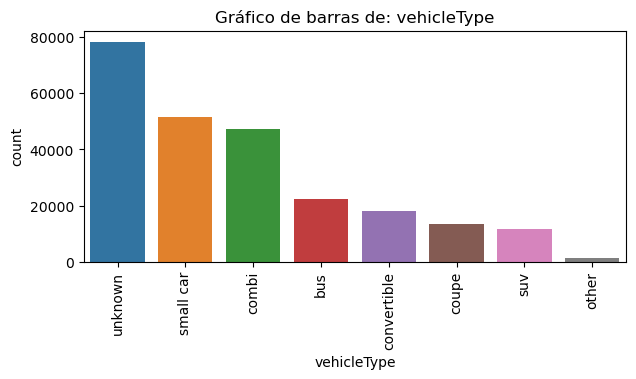

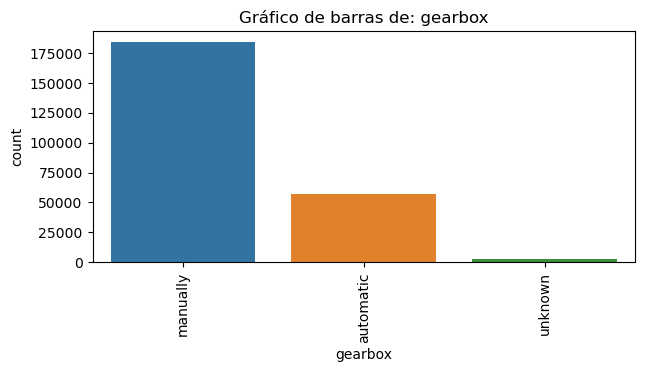

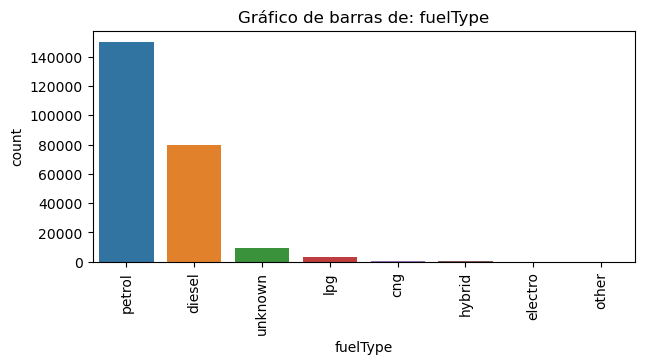

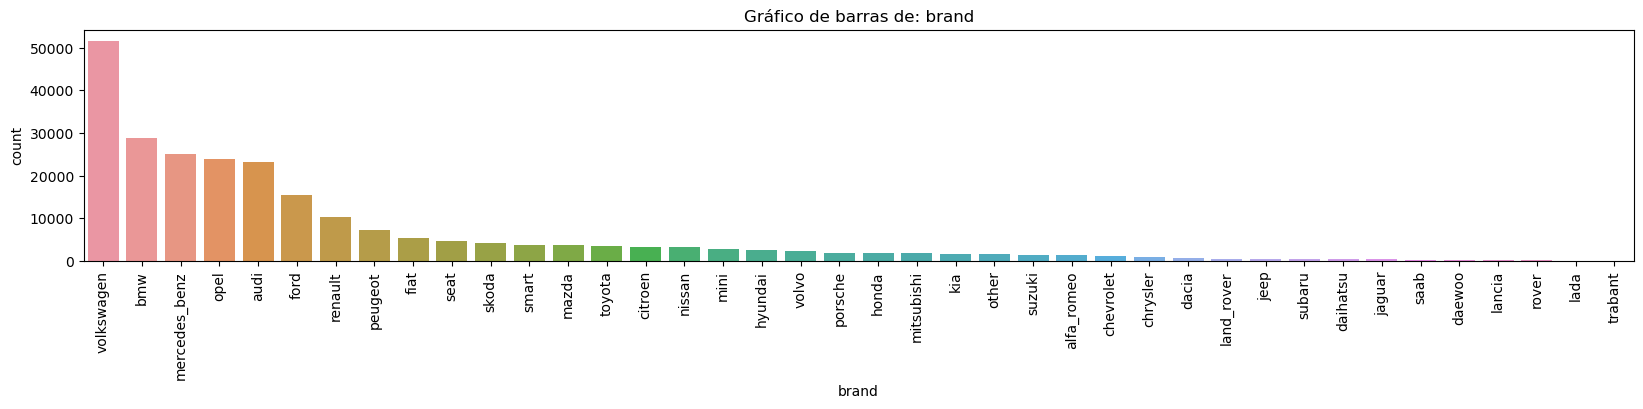

Vamos con los histogramas de las columnas numéricas



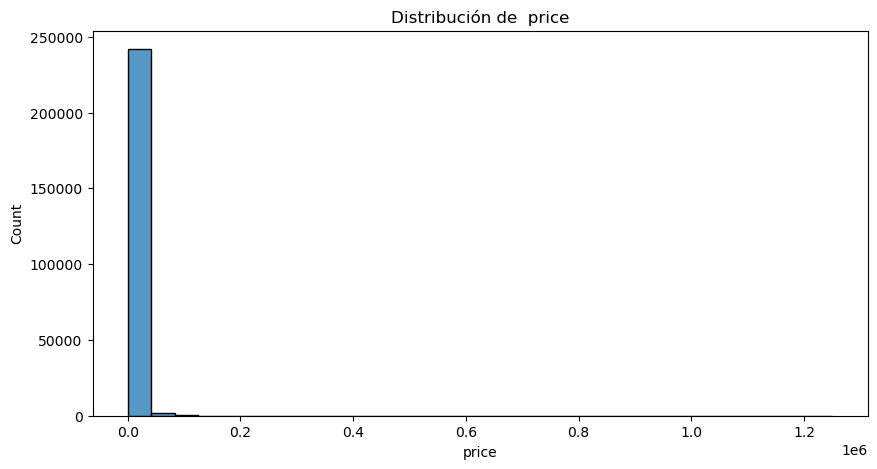

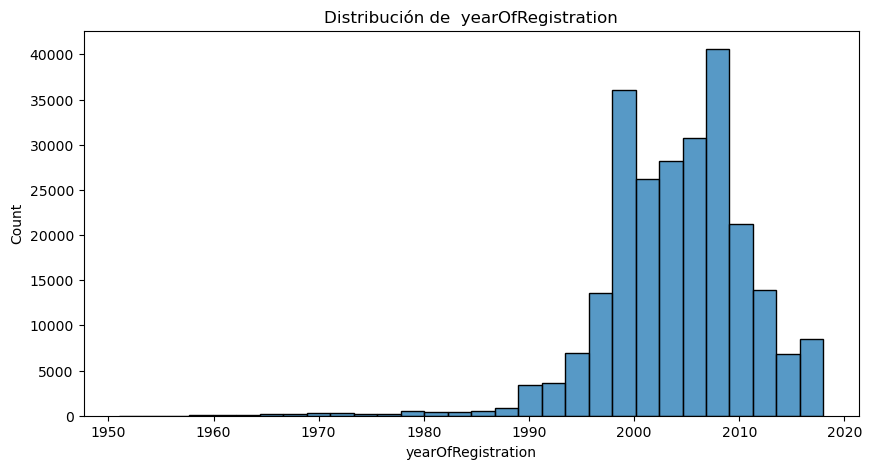

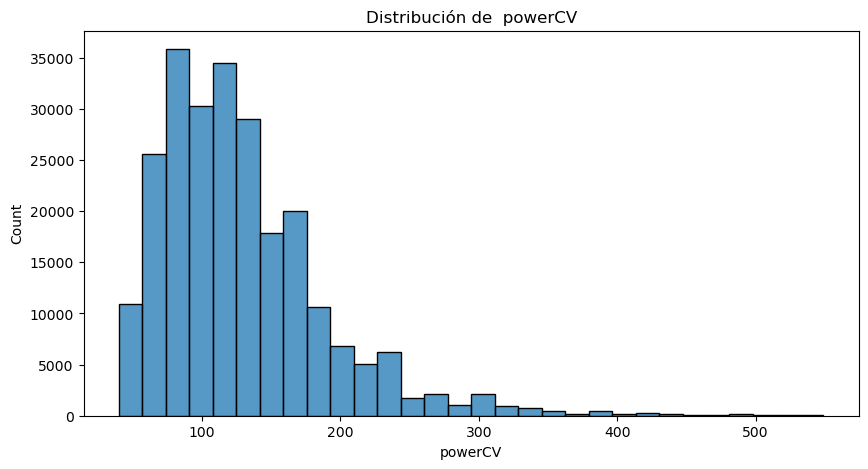

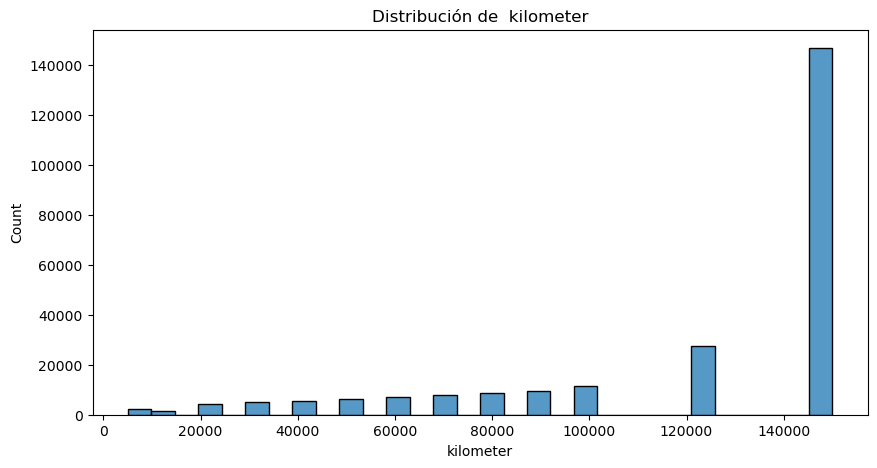

Vayamos con los boxplot


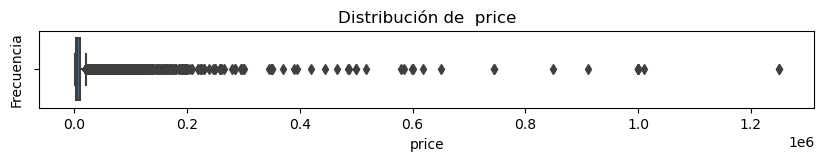

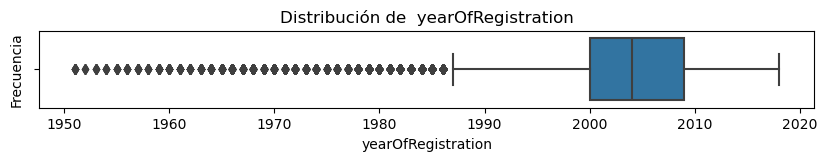

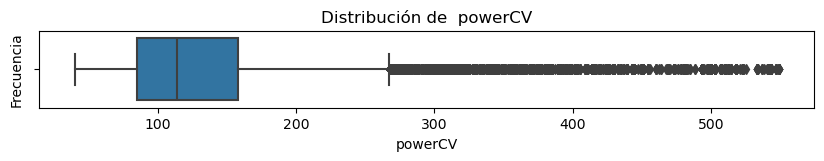

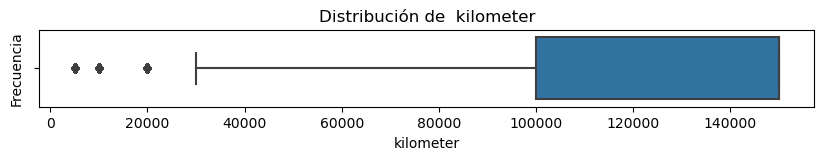

In [11]:
eda(df)

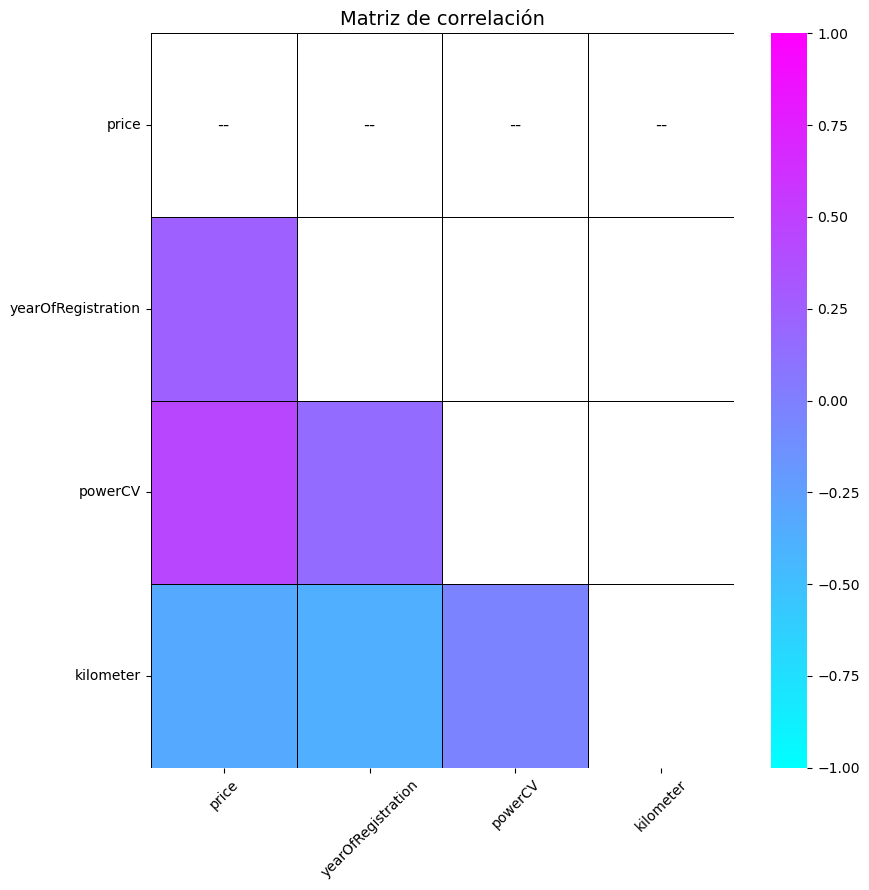

In [12]:
matriz_correlacion(df)